In [ ]:
import pandas as pd
import requests
import os
from io import StringIO
from datetime import datetime
import re

# Set the working directory to where you want to save the data
os.chdir(r"C:\Users\ryanb\OneDrive\Desktop\School\Projects\fantasy point predictor\data")

# Initialize an empty DataFrame to hold all positions combined
merged_df = pd.DataFrame()

# Initialize dictionary to hold cumulative data per position
position_dfs = {
    'qb': pd.DataFrame(),
    'rb': pd.DataFrame(),
    'wr': pd.DataFrame(),
    'te': pd.DataFrame(),
    'k': pd.DataFrame(),
    'dst': pd.DataFrame()
}

# Dictionary to map team names to their abbreviations
team_abbreviations = {
    "Arizona Cardinals": "ARI",
    "Atlanta Falcons": "ATL",
    "Baltimore Ravens": "BAL",
    "Buffalo Bills": "BUF",
    "Carolina Panthers": "CAR",
    "Chicago Bears": "CHI",
    "Cincinnati Bengals": "CIN",
    "Cleveland Browns": "CLE",
    "Dallas Cowboys": "DAL",
    "Denver Broncos": "DEN",
    "Detroit Lions": "DET",
    "Green Bay Packers": "GB",
    "Houston Texans": "HOU",
    "Indianapolis Colts": "IND",
    "Jacksonville Jaguars": "JAX",
    "Kansas City Chiefs": "KC",
    "Las Vegas Raiders": "LV",
    "Los Angeles Chargers": "LAC",
    "Los Angeles Rams": "LAR",
    "Miami Dolphins": "MIA",
    "Minnesota Vikings": "MIN",
    "New England Patriots": "NE",
    "New Orleans Saints": "NO",
    "New York Giants": "NYG",
    "New York Jets": "NYJ",
    "Philadelphia Eagles": "PHI",
    "Pittsburgh Steelers": "PIT",
    "San Francisco 49ers": "SF",
    "Seattle Seahawks": "SEA",
    "Tampa Bay Buccaneers": "TB",
    "Tennessee Titans": "TEN",
    "Washington Commanders": "WAS",
}

for year in range(2021, datetime.now().year):
    for week in range(1, 19):

        qb_url = f"https://www.fantasypros.com/nfl/projections/qb.php?week={week}&year={year}"
        rb_url = f"https://www.fantasypros.com/nfl/projections/rb.php?week={week}&scoring=PPR&year={year}"
        wr_url = f"https://www.fantasypros.com/nfl/projections/wr.php?week={week}&scoring=PPR&year={year}"
        te_url = f"https://www.fantasypros.com/nfl/projections/te.php?week={week}&scoring=PPR&year={year}"
        k_url = f"https://www.fantasypros.com/nfl/projections/k.php?week={week}&year={year}"
        dst_url = f"https://www.fantasypros.com/nfl/projections/dst.php?week={week}&year={year}"

        url_dict = {
            'qb': qb_url,
            'rb': rb_url,
            'wr': wr_url,
            'te': te_url,
            'k': k_url,
            'dst': dst_url
        }

        for position, url in url_dict.items():
            if not requests.head(url).ok:
                print(f"Skipping {url} as it does not exist.")
                continue

            # Get the page content
            response = requests.get(url)
            response.raise_for_status()

            tables = pd.read_html(StringIO(response.text))
            df = tables[0].copy()

            if isinstance(df.columns, pd.MultiIndex):
                df.columns = ['Player' if i == 0 else f"{col[0]}_{col[1]}" for i, col in enumerate(df.columns)]
                df.rename(columns={'MISC_FPTS': 'FPTS'}, inplace=True)
            else:
                df.columns = ['Player' if i == 0 else col for i, col in enumerate(df.columns)]
            
            # Add metadata columns
            if position == 'dst':
                df['Team'] = df['Player'].map(team_abbreviations)
            else:
                df[['Player', 'Team']] = df['Player'].str.rsplit(' ', n=1, expand=True)

            df['Week'] = week
            df['Year'] = year
            df['Position'] = position

            # Append to the cumulative DataFrame for the position
            position_dfs[position] = pd.concat([position_dfs[position], df], ignore_index=True)

            # Also append to the global merged DataFrame
            merged_df = pd.concat([merged_df, df], ignore_index=True)

# Save each position's full data to its own CSV
for position, df in position_dfs.items():
    df.to_csv(f"{position}_projections.csv", index=False)

# Save the combined data for all positions
merged_df.to_csv("full_projections.csv", index=False)



In [30]:
import pandas as pd
import requests
import os
from io import StringIO
from datetime import datetime
import re

# Set the working directory to where you want to save the data
os.chdir(r"C:\Users\ryanb\OneDrive\Desktop\School\Projects\fantasy point predictor\data")

# Initialize an empty DataFrame to hold all positions combined
merged_df = pd.DataFrame()

# Initialize dictionary to hold cumulative data per position
position_dfs = {
    'qb': pd.DataFrame(),
    'rb': pd.DataFrame(),
    'wr': pd.DataFrame(),
    'te': pd.DataFrame(),
    'k': pd.DataFrame(),
    'dst': pd.DataFrame()
}

# Dictionary to map team names to their abbreviations
team_abbreviations = {
    "Arizona Cardinals": "ARI",
    "Atlanta Falcons": "ATL",
    "Baltimore Ravens": "BAL",
    "Buffalo Bills": "BUF",
    "Carolina Panthers": "CAR",
    "Chicago Bears": "CHI",
    "Cincinnati Bengals": "CIN",
    "Cleveland Browns": "CLE",
    "Dallas Cowboys": "DAL",
    "Denver Broncos": "DEN",
    "Detroit Lions": "DET",
    "Green Bay Packers": "GB",
    "Houston Texans": "HOU",
    "Indianapolis Colts": "IND",
    "Jacksonville Jaguars": "JAX",
    "Kansas City Chiefs": "KC",
    "Las Vegas Raiders": "LV",
    "Los Angeles Chargers": "LAC",
    "Los Angeles Rams": "LAR",
    "Miami Dolphins": "MIA",
    "Minnesota Vikings": "MIN",
    "New England Patriots": "NE",
    "New Orleans Saints": "NO",
    "New York Giants": "NYG",
    "New York Jets": "NYJ",
    "Philadelphia Eagles": "PHI",
    "Pittsburgh Steelers": "PIT",
    "San Francisco 49ers": "SF",
    "Seattle Seahawks": "SEA",
    "Tampa Bay Buccaneers": "TB",
    "Tennessee Titans": "TEN",
    "Washington Commanders": "WAS",
}

for year in range(2021, datetime.now().year):
    for week in range(1, 19):

        qb_url = f"https://www.fantasypros.com/nfl/stats/qb.php?year={year}&week={week}&scoring=PPR&range=week"
        rb_url = f"https://www.fantasypros.com/nfl/stats/rb.php?year={year}&week={week}&scoring=PPR&range=week"
        wr_url = f"https://www.fantasypros.com/nfl/stats/wr.php?year={year}&week={week}&scoring=PPR&range=week"
        te_url = f"https://www.fantasypros.com/nfl/stats/te.php?year={year}&week={week}&scoring=PPR&range=week"
        k_url = f"https://www.fantasypros.com/nfl/stats/k.php?year={year}&week={week}&scoring=PPR&range=week"
        dst_url = f"https://www.fantasypros.com/nfl/stats/dst.php?year={year}&week={week}&scoring=PPR&range=week"


# https://www.fantasypros.com/nfl/stats/k.php?year=2021&week=1&scoring=PPR&range=week

        url_dict = {
            'qb': qb_url,
            'rb': rb_url,
            'wr': wr_url,
            'te': te_url,
            'k': k_url,
            'dst': dst_url
        }

        for position, url in url_dict.items():
            if not requests.head(url).ok:
                print(f"Skipping {url} as it does not exist.")
                continue

            # Get the page content
            response = requests.get(url)
            response.raise_for_status()

            tables = pd.read_html(StringIO(response.text))
            df = tables[0].copy()

            if isinstance(df.columns, pd.MultiIndex):
                df.columns = ['Player' if i == 1 else f"{col[0]}_{col[1]}" for i, col in enumerate(df.columns)]
                df.rename(columns={'MISC_FPTS': 'FPTS'}, inplace=True)
            else:
                df.columns = ['Player' if i == 1 else col for i, col in enumerate(df.columns)]

            # Add metadata columns
            df[['Player', 'Team']] = df['Player'].apply(
                lambda s: pd.Series(
                    re.match(r'^(.*)\s+\((\w{2,3})\)$', s).groups()
                    if re.match(r'^(.*)\s+\((\w{2,3})\)$', s)
                    else s.rsplit(' ', 1) if len(s.rsplit(' ', 1)) == 2
                    else (s, None)
                )
            )

            df['Week'] = week
            df['Year'] = year
            df['Position'] = position

            # Append to the cumulative DataFrame for the position
            position_dfs[position] = pd.concat([position_dfs[position], df], ignore_index=True)

            # Also append to the global merged DataFrame
            merged_df = pd.concat([merged_df, df], ignore_index=True)

# Save each position's full data to its own CSV
for position, df in position_dfs.items():
    df.to_csv(f"{position}_actuals.csv", index=False)

# Save the combined data for all positions
merged_df.to_csv("full_actuals.csv", index=False)




Average MSE: 27.7798
Average MAE: 3.5260
Average R^2: 0.5419


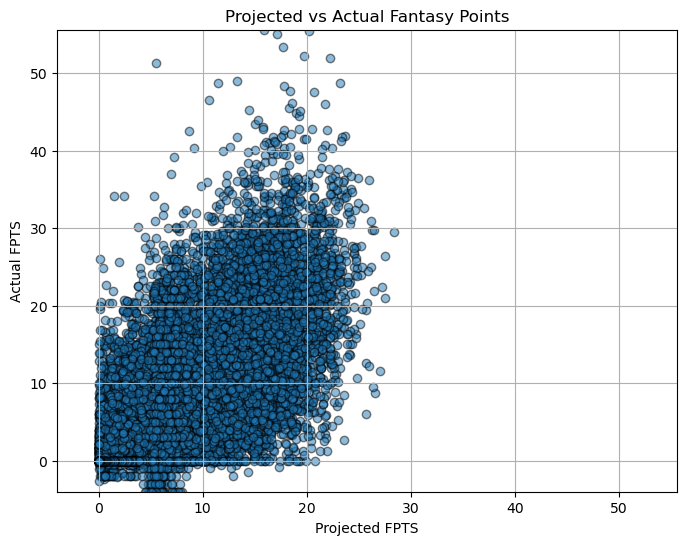

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV files
actuals = pd.read_csv("full_actuals.csv")
projections = pd.read_csv("full_projections.csv")

# Rename the 'FPTS' columns before merge to avoid conflicts
actuals = actuals.rename(columns={"FPTS": "Actual FPTS"})
projections = projections.rename(columns={"FPTS": "Projected FPTS"})

# Merge on Player, Year, Week
merged_df = pd.merge(
    projections,
    actuals,
    on=["Player", "Year", "Week"],
    how="inner",
    suffixes=("_projections", "_actuals")
)

# Keep only keys plus the renamed FPTS columns
merged_df = merged_df[["Player", "Year", "Week", "Actual FPTS", "Projected FPTS"]]

X = merged_df[["Projected FPTS"]].values  # feature matrix, needs 2D
y = merged_df["Actual FPTS"].values       # target vector

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R^2: {np.mean(r2_scores):.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Projected FPTS"], merged_df["Actual FPTS"], alpha=0.5, edgecolor='k')

plt.xlabel("Projected FPTS")
plt.ylabel("Actual FPTS")
plt.title("Projected vs Actual Fantasy Points")
plt.grid(True)

min_val = min(merged_df["Projected FPTS"].min(), merged_df["Actual FPTS"].min())
max_val = max(merged_df["Projected FPTS"].max(), merged_df["Actual FPTS"].max())

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.show()

display(merged_df)